# Predict Function

After performing a parameter update, which is done after some new measurement is collected, the next step is to incorporate motion into our Gaussian calculations. Recall that, as we estimate the location of a robot or self-driving car:
* the measurement update *increases* our estimation certainty
* the motion update/prediction *decreases* our certainty

That is because every motion has some chance of under or overshooting its goal, and since motion is not exact, we end up losing some certainty about our exact location after each motion.

Let's take the formulas from the example below and use them to write a program that takes in a mean and a motion and squared variances for both of those quantities, and returns a *new*, updated mean and variance for a new gaussian. This step is called the **motion update** or the predict step.

<img src='images/motion_update.png' width="50%" height="50%">


Below is our usual Gaussian equation and imports.

In [2]:
# import math functions
from math import *
import matplotlib.pyplot as plt
import numpy as np

# gaussian function
def f(mu, sigma2, x):
    ''' f takes in a mean and squared variance, and an input x
       and returns the gaussian value.'''
    coefficient = 1.0 / sqrt(2.0 * pi *sigma2)
    exponential = exp(-0.5 * (x-mu) ** 2 / sigma2)
    return coefficient * exponential
 

For convenience, you've also been given the complete `update` code that performs a parameter update when an initial belief and new measurement information are merged.

In [3]:
# the update function
def update(mean1, var1, mean2, var2):
    ''' This function takes in two means and two squared variance terms,
        and returns updated gaussian parameters.'''
    # Calculate the new parameters
    new_mean = (var2*mean1 + var1*mean2)/(var2+var1)
    new_var = 1/(1/var2 + 1/var1)
    
    return [new_mean, new_var]

### QUIZ: Write a `predict` function that returns new values for the mean and squared variance of a Gaussian after a motion.

This function should take in parameters for an initial belief and motion and perform the measurement update as seen in the image at the top of this notebook.

In [4]:
# the motion update/predict function
def predict(mean1, var1, mean2, var2):
    ''' This function takes in two means and two squared variance terms,
        and returns updated gaussian parameters, after motion.'''
    ## TODO: Calculate the new parameters
    new_mean = mean1 + mean2
    new_var = var1 + var2
    
    return [new_mean, new_var]

In [5]:
# test your implementation
new_params = predict(10, 4, 12, 4)
print(new_params)

[22, 8]


### Plot a Gaussian

Plot a Gaussian by looping through a range of x values and creating a resulting list of Gaussian values, `g`, as shown below. You're encouraged to see what happens if you change the values of `mu` and `sigma2`.

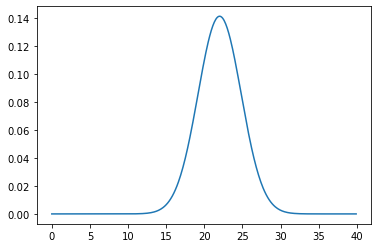

In [6]:
# display a gaussian over a range of x values
# define the parameters
mu = new_params[0]
sigma2 = new_params[1]

# define a range of x values
x_axis = np.arange(0, 40, 0.1)

# create a corresponding list of gaussian values
g = []
for x in x_axis:
    g.append(f(mu, sigma2, x))

# plot the result 
plt.plot(x_axis, g)